In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import os
from adjustText import adjust_text

In [3]:
data = pd.read_excel('dataset_2/cars_2.xlsx')
display(data.head())

,Brand,Type,Wheel-base,Length,Width,Height,Curb-weight,Cylinders,Engine,Compression-ratio,Horsepower,City-mpg,Highway-mpg,Price
0,alfa-romero,convertible,88.6,168.8,64.1,48.8,2548,4,130,9.0,111,21,27,13495
1,alfa-romero,convertible,88.6,168.8,64.1,48.8,2548,4,130,9.0,111,21,27,16500
2,alfa-romero,hatchback,94.5,171.2,65.5,52.4,2823,6,152,9.0,154,19,26,16500
3,audi,sedan,99.4,176.6,66.4,54.3,2824,5,136,8.0,115,18,22,17450
4,audi,sedan,99.8,177.3,66.3,53.1,2507,5,136,8.5,110,19,25,15250


In [4]:
# Get categorical columns
cat_cols = data.select_dtypes(include=['object']).columns

# Remove categorical columns
data_reduced = data.drop(cat_cols, axis=1)
# n = number of rows, p = number of columns
n, p = data_reduced.shape
display(data_reduced.head())

,Wheel-base,Length,Width,Height,Curb-weight,Cylinders,Engine,Compression-ratio,Horsepower,City-mpg,Highway-mpg,Price
0,88.6,168.8,64.1,48.8,2548,4,130,9.0,111,21,27,13495
1,88.6,168.8,64.1,48.8,2548,4,130,9.0,111,21,27,16500
2,94.5,171.2,65.5,52.4,2823,6,152,9.0,154,19,26,16500
3,99.4,176.6,66.4,54.3,2824,5,136,8.0,115,18,22,17450
4,99.8,177.3,66.3,53.1,2507,5,136,8.5,110,19,25,15250


Since the variables have different units of measurements (grams, micrograms and milligrams), we will be carrying out PCA on the correlation matrix instead of on the covariance matrix. To do so, we first have to standardize the data

$\begin{equation}
X' = \frac{X-\mu}{\sigma}
\nonumber
\end{equation}$

Note: *In the event that the population mean and population stdev is unknown, the sample mean or the sample stdev can also be used*



In [5]:
data_reduced = (data_reduced - data_reduced.mean())/data_reduced.std()

### Part a

In [6]:
# Implement PCA using sklearn

from sklearn.decomposition import PCA

# Extract 2 PCs from the data
# Step 1-4: Recenter the data, calculate the covariance matrix, and find the eigenvalues and eigenvectors, and choose PCs to form Y
pca = PCA(n_components=p).fit(data_reduced)

#Note that pca.transform() returns scores based on centred data
# Step 5: Transform the data to its principal components
pca_samples = pca.transform(data_reduced)

In [7]:
# Computes the PCs and percentage variance explained
# Pass original data and returns of PCA to this function.
# This function returns a table summarising the PCs, eigenvalues and percentage variance explained.
# The eigenvalues obtained may sometimes be slightly different due to difference in method.

def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    # PCA eigenvalues
    ev = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(ev, 4), columns = ['Eigenvalue']) 
    eigenvalues.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # PCA cumulative explained variance
    cum_ratios = pca.explained_variance_ratio_.cumsum().reshape(len(pca.components_), 1)
    cum_variance_ratios = pd.DataFrame(np.round(cum_ratios, 4), columns = ['Cumulative Explained Variance'])
    cum_variance_ratios.index = dimensions
    
    # Return a concatenated DataFrame
    return pd.concat([eigenvalues, variance_ratios, cum_variance_ratios, components], axis = 1)


In [8]:
pca_result = pca_results(data_reduced, pca)
display(pca_result)

,Eigenvalue,Explained Variance,Cumulative Explained Variance,Wheel-base,Length,Width,Height,Curb-weight,Cylinders,Engine,Compression-ratio,Horsepower,City-mpg,Highway-mpg,Price
PC 1,7.5162,0.6264,0.6264,0.2772,0.3212,0.3212,0.1009,0.3494,0.2655,0.3317,-0.0024,0.3093,-0.3125,-0.3211,0.3280
PC 2,2.0146,0.1679,0.7942,-0.3777,-0.2461,-0.1798,-0.5322,-0.0941,0.2142,0.1237,-0.5003,0.2945,-0.2088,-0.1637,0.0614
PC 3,1.0856,0.0905,0.8847,-0.1292,-0.1377,0.0461,-0.3602,0.0397,0.4055,0.2723,0.5898,0.0505,0.3217,0.2998,0.2203
PC 4,0.4319,0.0360,0.9207,-0.0426,-0.1290,-0.2599,0.6256,-0.1518,0.5514,0.1462,-0.3049,-0.0361,0.1748,0.1635,0.1504
PC 5,0.3104,0.0259,0.9466,-0.4618,-0.1213,-0.3864,0.3397,0.0928,-0.1990,-0.0720,0.4564,0.3138,-0.2787,-0.2216,0.1430
PC 6,0.1850,0.0154,0.9620,-0.0271,0.0002,-0.0380,-0.0280,0.0312,0.5069,-0.0561,0.2365,-0.2846,-0.2453,-0.3634,-0.6379
PC 7,0.1328,0.0111,0.9730,-0.3445,-0.2785,0.7342,0.1560,-0.2478,0.1038,-0.3191,0.0225,-0.0883,-0.0956,-0.0936,0.2003
PC 8,0.1102,0.0092,0.9822,-0.3148,0.3857,0.2372,0.1196,0.0381,0.0416,-0.0155,-0.0664,0.5509,0.1583,0.3278,-0.4876
PC 9,0.0807,0.0067,0.9890,0.2448,-0.7233,0.1662,0.1415,0.2896,-0.1590,0.2473,-0.0239,0.2673,0.1630,-0.0773,-0.3073
PC 10,0.0694,0.0058,0.9947,-0.5090,0.0843,0.1143,0.0756,0.4478,-0.1850,0.4528,-0.1569,-0.4965,0.0485,0.0328,-0.0275


Plot the scree plot to later decide on number of PCs to keep

<Figure size 640x480 with 0 Axes>

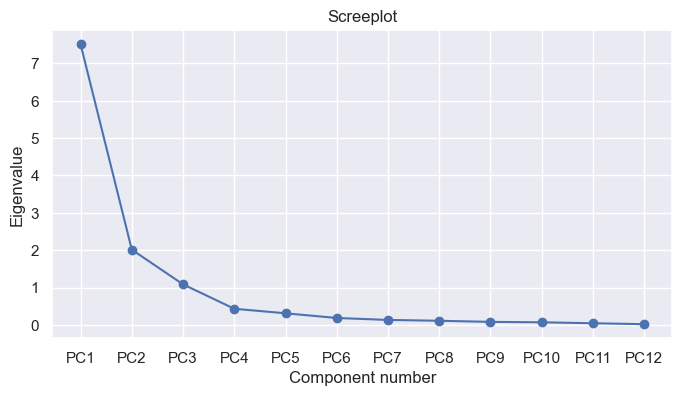

In [9]:
#Scree plot
import matplotlib.ticker as ticker
plt.clf()

fig1, ax1 = plt.subplots(figsize=(8,4))

# X axis is the component number and y-axis is the eigenvalue
ax1.plot(np.arange(1, len(pca.explained_variance_)+1), pca.explained_variance_, marker='o')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set(xlabel = 'Component number', ylabel = 'Eigenvalue', title = 'Screeplot')

# Relabel the x-axis in terms of integers
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: 'PC' + str(int(x))))


plt.show()

To help us decide the number of PCs to keep, we will be using the three guidelines:
- By Kasier's rule, extract the first 3 PCs where eigenvalues (7.52, 2.01, 1.09) are > 1
- $1^{st}$  3 PCs already account for 88% of the total variance
- Scree Plot shows elbow at PC4 suggesting 3 PCs to extract

$\therefore$ let's extract the three PCs

In [10]:
# Extract three PCs
pca2 = PCA(n_components=3).fit(data_reduced)
scores2 = pca2.transform(data_reduced)

In [11]:
# This function plots the loading plot.
# Pass original data dataframe and returns of PCA to this function. Optional width, height and margin
# This function returns the axes of the loading plot

def plot_loadingplot(data, pca, margin=0.5, PC1=0, PC2=1, ax=None):

    #Set limits for figure
    x_min = min(pca.components_[PC1,:].min(),0)-margin
    x_max = max(pca.components_[PC1,:].max(),0)+margin
    y_min = min(pca.components_[PC2,:].min(),0)-margin
    y_max = max(pca.components_[PC2,:].max(),0)+margin

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    #Scaling factor for text position
    texts = []

    for i, v in enumerate(pca.components_.T):
        ax.arrow(0, 0, v[PC1], v[PC2], head_width=0.1, head_length=0.1, linewidth=2, color='red')
        texts.append(ax.text(v[PC1], v[PC2], data.columns[i].split("_")[0], color='black', ha='center', va='center', fontsize=10))
    
    adjust_text(texts, ax=ax)

    ax.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    ax.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    ax.set_xlabel(f"PC {PC1+1}", fontsize=14)
    ax.set_ylabel(f"PC {PC2+1}", fontsize=14)
    ax.set_title(f"Loading plot of PC{PC1+1} vs PC{PC2+1}", fontsize = 14)
    
    return ax

In [12]:
pca_result2 = pca_results(data_reduced, pca2)
display(pca_result2)

,Eigenvalue,Explained Variance,Cumulative Explained Variance,Wheel-base,Length,Width,Height,Curb-weight,Cylinders,Engine,Compression-ratio,Horsepower,City-mpg,Highway-mpg,Price
PC 1,7.5162,0.6264,0.6264,0.2772,0.3212,0.3212,0.1009,0.3494,0.2655,0.3317,-0.0024,0.3093,-0.3125,-0.3211,0.3280
PC 2,2.0146,0.1679,0.7942,-0.3777,-0.2461,-0.1798,-0.5322,-0.0941,0.2142,0.1237,-0.5003,0.2945,-0.2088,-0.1637,0.0614
PC 3,1.0856,0.0905,0.8847,-0.1292,-0.1377,0.0461,-0.3602,0.0397,0.4055,0.2723,0.5898,0.0505,0.3217,0.2998,0.2203


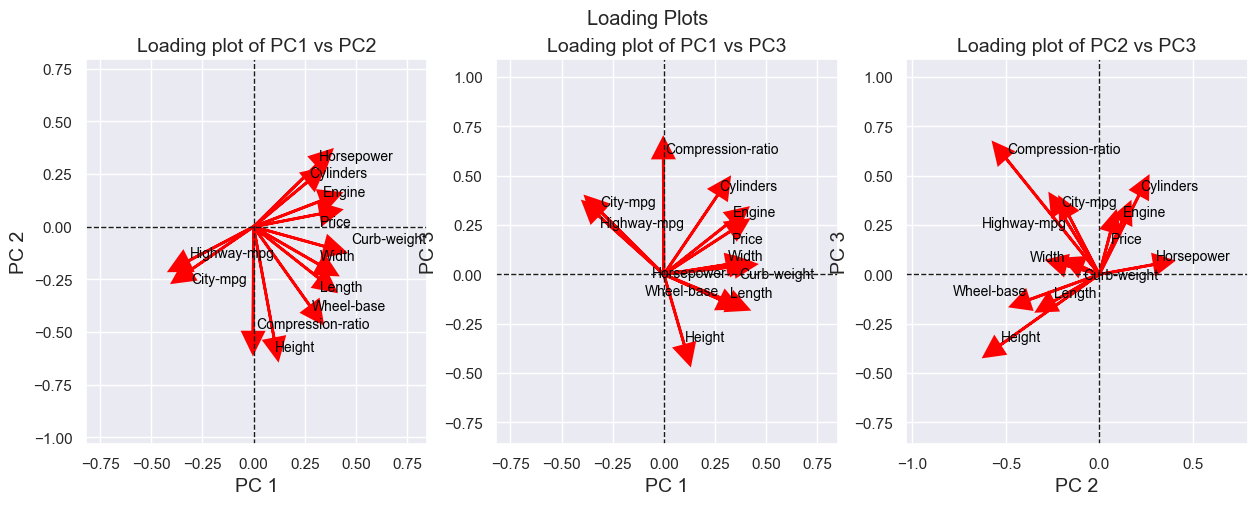

In [13]:
# Plot three different score plots
fig, ax2 = plt.subplots(1,3, figsize=(15,5))
plt.suptitle("Loading Plots")

# Go through all possible combinations of PCs
counter = 0
for i in range(3):
    for j in range(i+1, 3):
        plot_loadingplot(data_reduced, pca2, PC1=i, PC2=j, ax=ax2[counter])
        counter += 1

plt.show()

In [14]:
#Obtain scores from original data that are not centred

scores2_notcentred = np.dot(data_reduced, pca2.components_.T)
scores2_notcentred = pd.DataFrame(scores2_notcentred, columns = ['PC1', 'PC2', 'PC3'])
display(scores2_notcentred.head())

,PC1,PC2,PC3
0,-0.698309,2.362004,0.283063
1,-0.578657,2.384407,0.363453
2,1.475739,1.917674,0.581741
3,1.616775,0.710230,-0.734695
4,1.064676,0.784174,-0.414884


In [15]:
# Plots score plot with data labels
# Pass original data, un-centred scores and returns of PCA to this function. Optional width, height and margin.
# This function returns the axes of the score plot

def scoreplot_label(data, scores, ax=None, margin=0.5, PC1="PC1", PC2="PC2"):
    if ax is None:
        ax = sns.scatterplot(x=PC1, y=PC2, data = scores, hue=data['Type'])
    else:
        ax = sns.scatterplot(x=PC1, y=PC2, data = scores, hue=data['Type'], ax=ax)

    #Set limits for figure
    x_min = min(scores[PC1].min(),0)-margin
    x_max = max(scores[PC1].max(),0)+margin
    y_min = min(scores[PC2].min(),0)-margin
    y_max = max(scores[PC2].max(),0)+margin
  
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title(f"Score plot of {PC1} vs {PC2}", fontsize=14)
    ax.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    ax.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    return ax

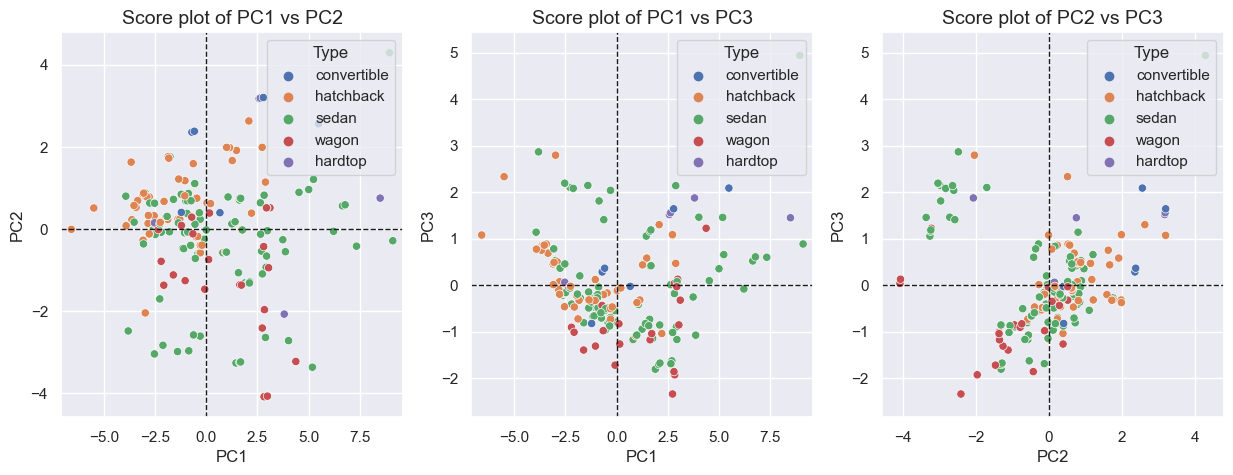

In [16]:
# Plot three different score plots
fig, ax3 = plt.subplots(1,3, figsize=(15,5))

# Go through all possible combinations of PCs
PCs = ['PC1', 'PC2', 'PC3']
counter = 0
for i in range(len(PCs)):
    for j in range(i+1, len(PCs)):
        PC1 = PCs[i]
        PC2 = PCs[j]
        scoreplot_label(data, scores2_notcentred, ax=ax3[counter], PC1=PC1, PC2=PC2)
        counter += 1

plt.show()